In [1]:
import pandas
import numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings; warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Classified Data.csv')

In [3]:
# Display the first few rows of the dataframe
print(df.head())

   Unnamed: 0       WTT       PTI       EQW       SBI       LQE       QWG  \
0           0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608   
1           1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450   
2           2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781   
3           3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128   
4           4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727   

        FDJ       PJF       HQE       NXJ  TARGET CLASS  
0  0.759697  0.643798  0.879422  1.231409             1  
1  0.675334  1.013546  0.621552  1.492702             0  
2  1.626351  1.154483  0.957877  1.285597             0  
3  1.409708  1.380003  1.522692  1.153093             1  
4  1.115596  0.646691  1.463812  1.419167             1  


In [4]:
# Display basic statistics of the numerical features
print(df.describe())

        Unnamed: 0          WTT          PTI          EQW          SBI  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    499.500000     0.949682     1.114303     0.834127     0.682099   
std     288.819436     0.289635     0.257085     0.291554     0.229645   
min       0.000000     0.174412     0.441398     0.170924     0.045027   
25%     249.750000     0.742358     0.942071     0.615451     0.515010   
50%     499.500000     0.940475     1.118486     0.813264     0.676835   
75%     749.250000     1.163295     1.307904     1.028340     0.834317   
max     999.000000     1.721779     1.833757     1.722725     1.634884   

               LQE          QWG          FDJ          PJF          HQE  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      1.032336     0.943534     0.963422     1.071960     1.158251   
std       0.243413     0.256121     0.255118     0.288982     0.293738   
min       0.315307     0.262389     0

In [5]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0      0
WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64


## EDA

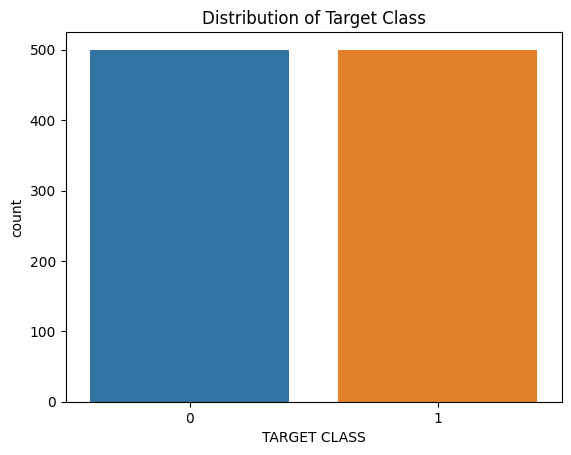

In [6]:
# Visualize the distribution of the target class
sns.countplot(x='TARGET CLASS', data=df)
plt.title('Distribution of Target Class')
plt.show()

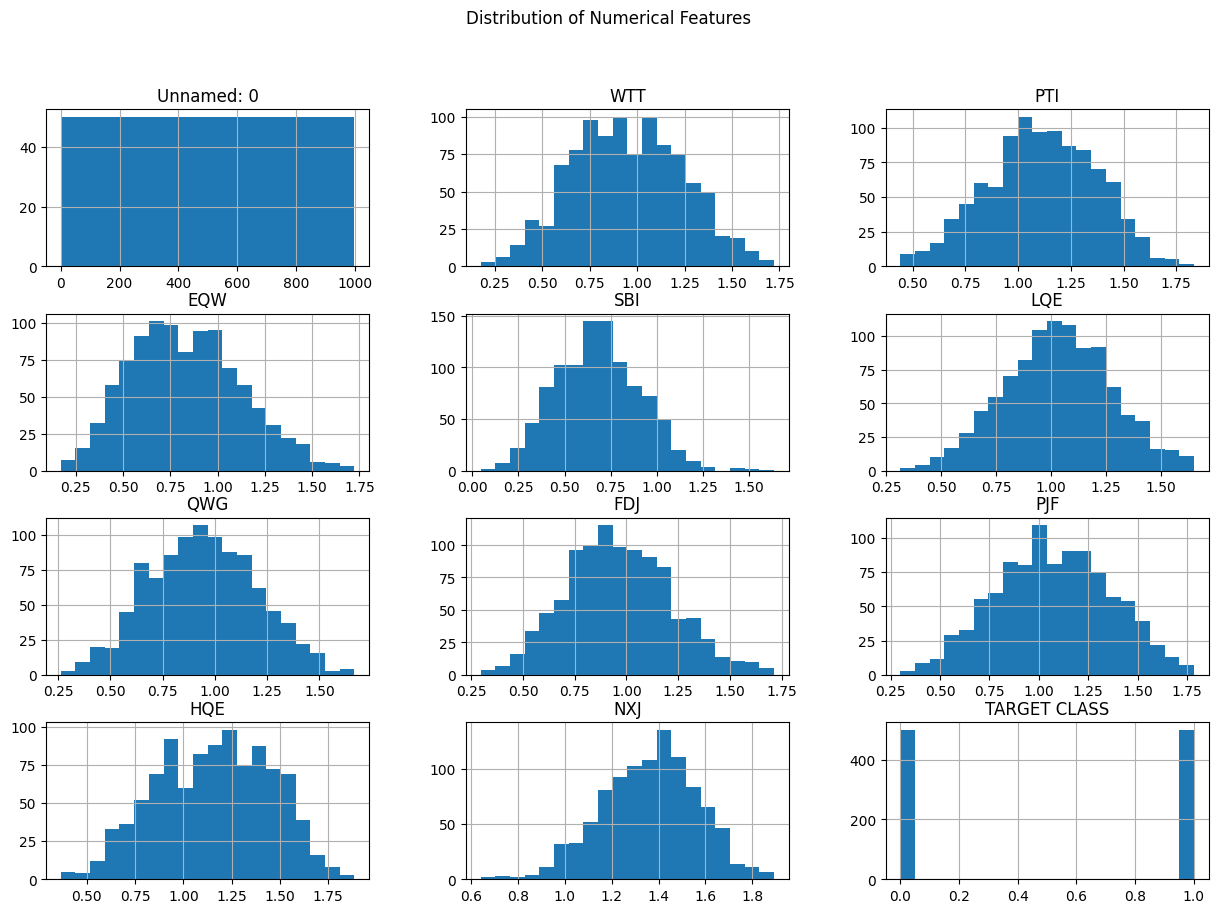

In [7]:
# Visualize the distribution of numerical features
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

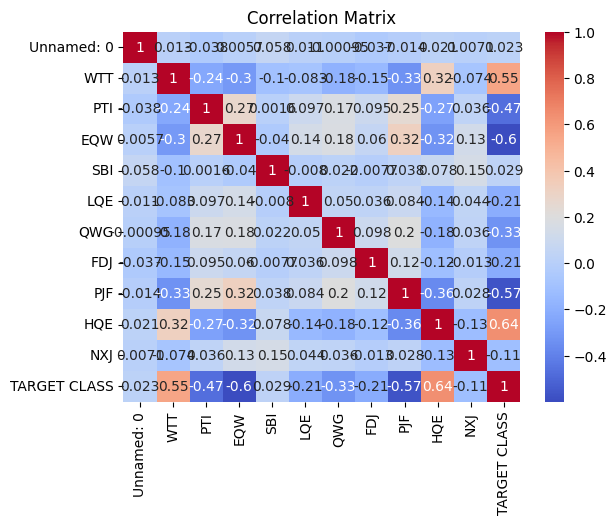

In [8]:
# Visualize the correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

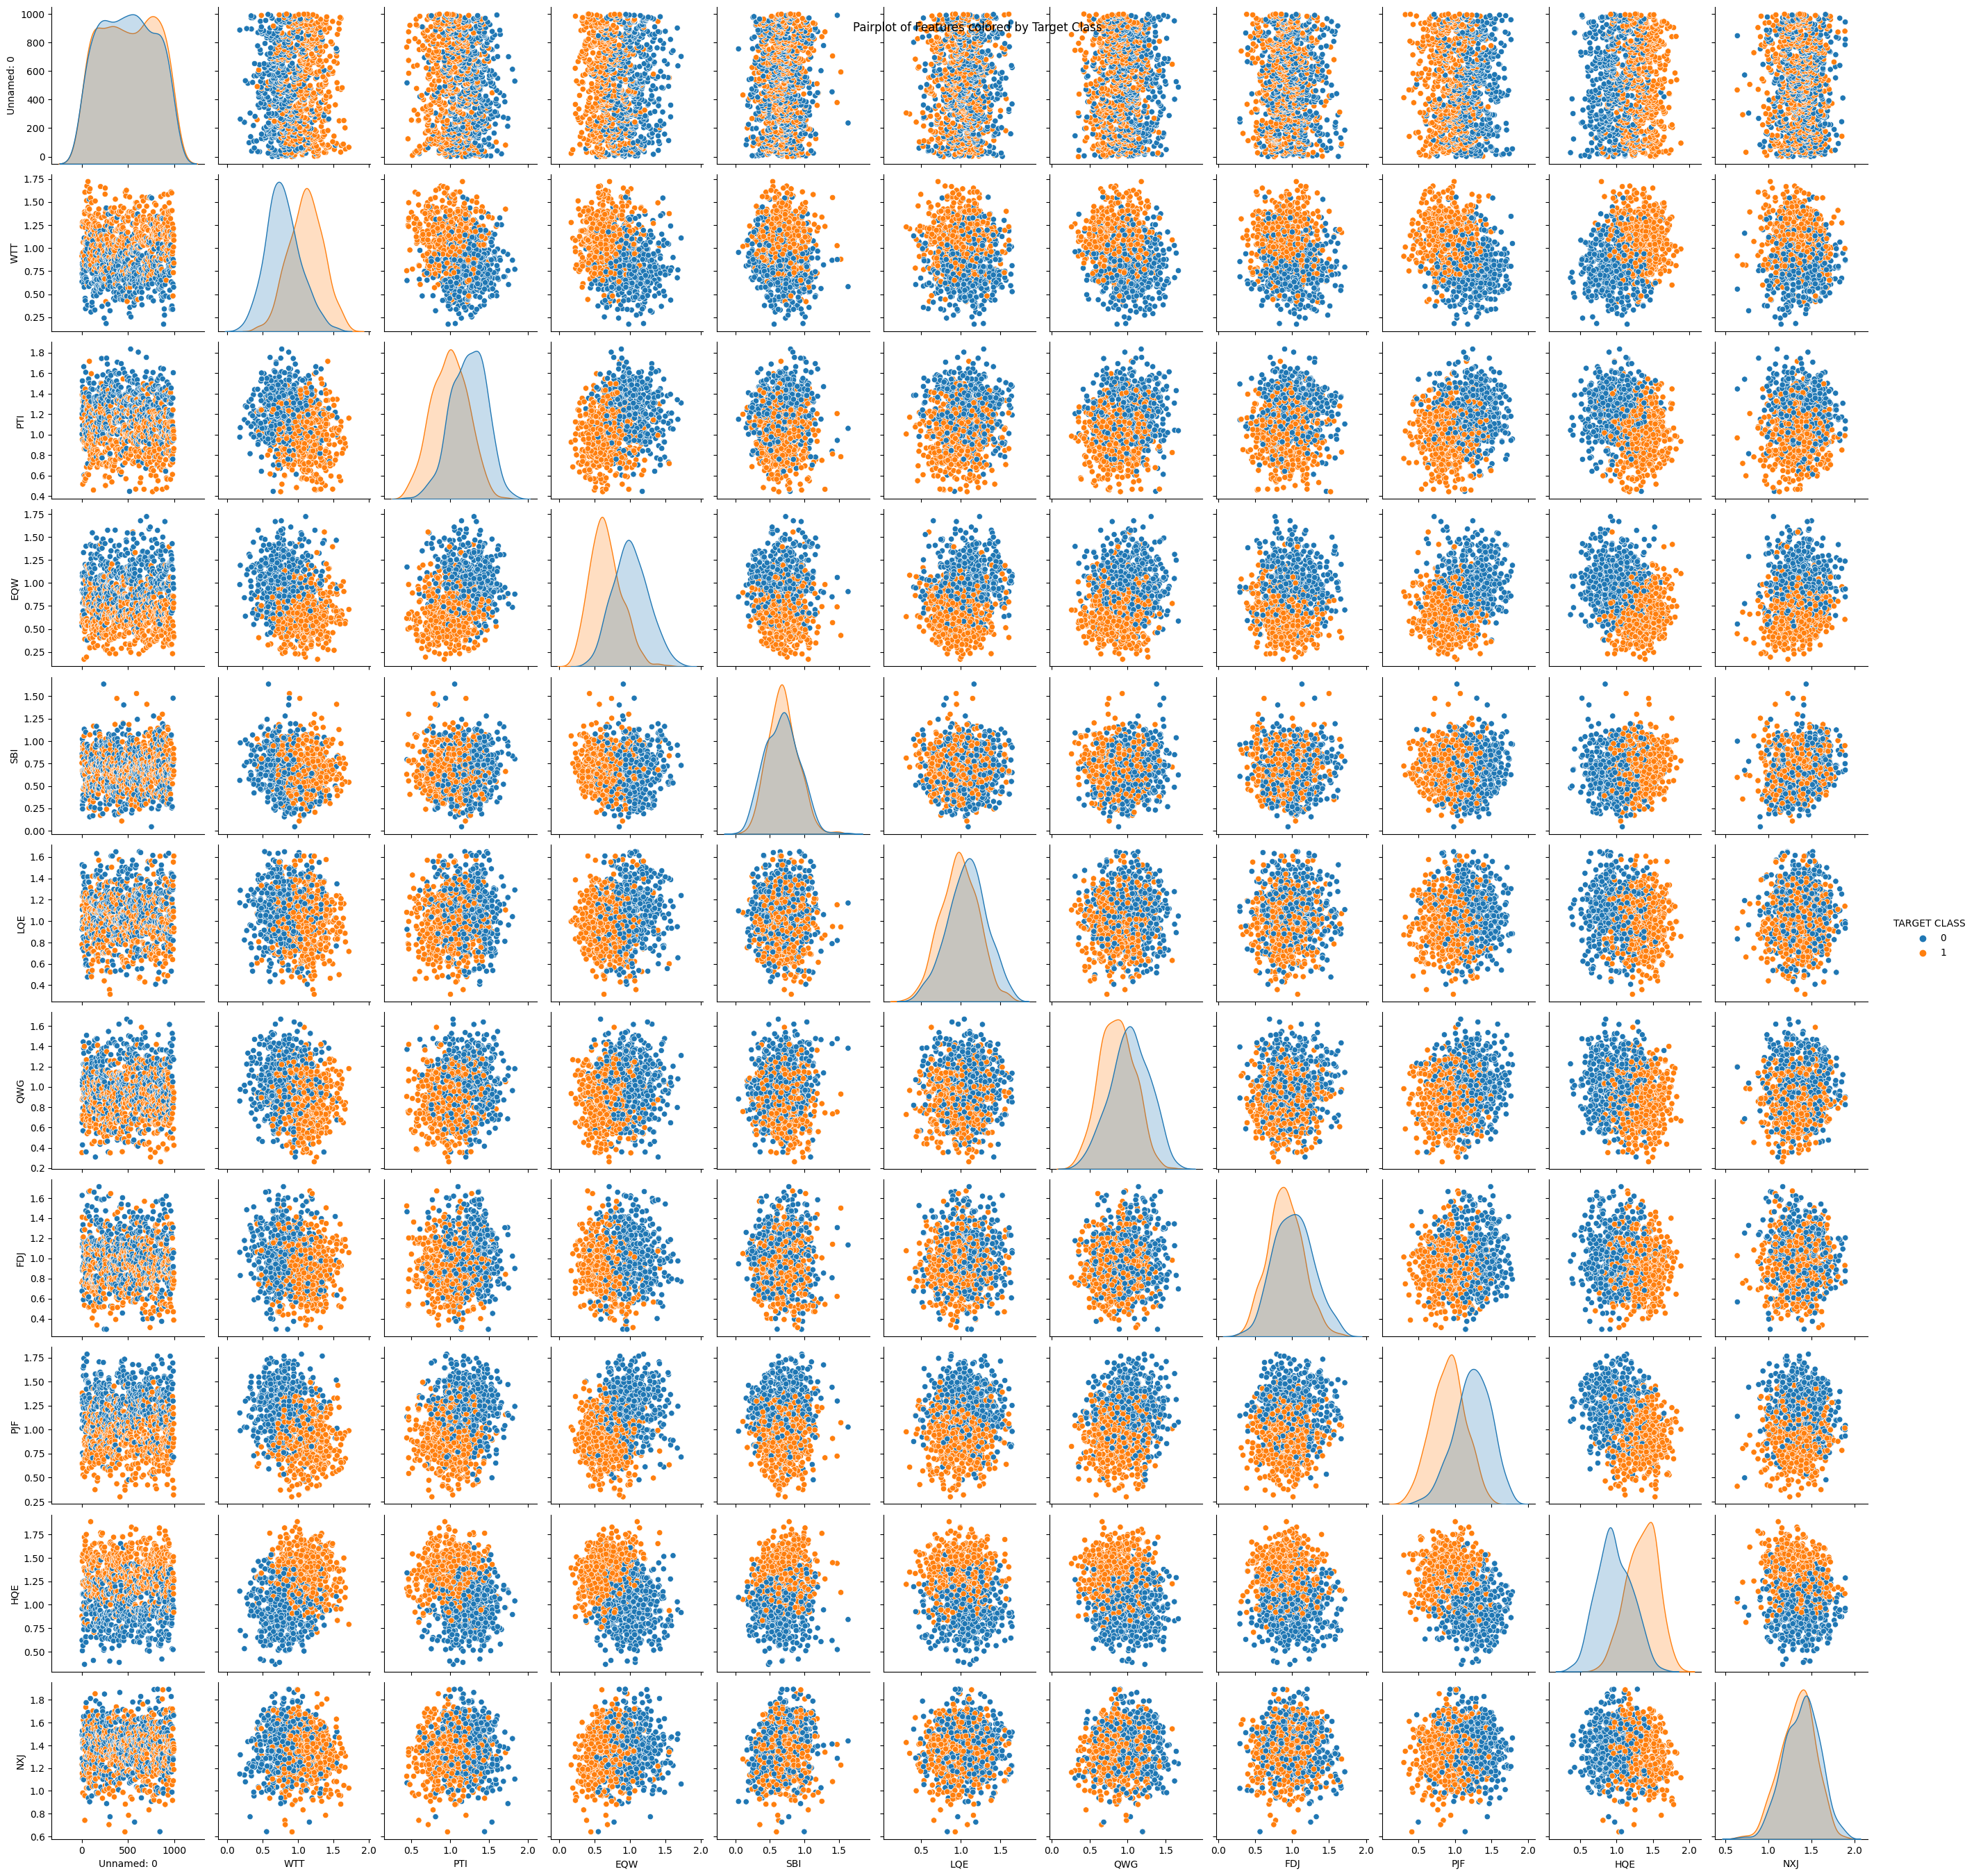

In [9]:
# Pairplot to visualize relationships between features
sns.pairplot(df, hue='TARGET CLASS')
plt.suptitle('Pairplot of Features colored by Target Class')
plt.show()

# Method 1

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, PowerTransformer, QuantileTransformer, Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [11]:
# Separate features (X) and target variable (y)
X = df.drop('TARGET CLASS', axis=1)
y = df['TARGET CLASS']

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
def knn_with_scalar(scalar_function, k_neighbors):
    # Initialize the scalar function
    scaler = scalar_function()

    # Fit and transform the scaler on the training data
    X_train_scaled = scaler.fit_transform(X_train)

    # Transform the test data using the same scaler
    X_test_scaled = scaler.transform(X_test)

    # Initialize the KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k_neighbors)

    # Fit the KNN classifier on the scaled training data
    knn_classifier.fit(X_train_scaled, y_train)

    # Make predictions on the scaled test data
    y_pred = knn_classifier.predict(X_test_scaled)

    # Calculate and print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')

### StandardScaler

In [14]:
# Example usage with StandardScaler and k_neighbors=5
knn_with_scalar(StandardScaler,5)

Accuracy: 0.95


### MinMaxScaler

In [15]:
# Example usage with MinMaxScaler and k_neighbors=5
knn_with_scalar(MinMaxScaler,5)

Accuracy: 0.94


### RobustScaler

In [16]:
# Example usage with RobustScaler and k_neighbors=5
knn_with_scalar(RobustScaler,5)

Accuracy: 0.94


### MaxAbsScaler

In [17]:
# Example usage with MaxAbsScaler and k_neighbors=5
knn_with_scalar(MaxAbsScaler,5)

Accuracy: 0.94


### PowerTransformer

In [18]:
# Example usage with PowerTransformer and k_neighbors=5
knn_with_scalar(PowerTransformer,5)

Accuracy: 0.94


### QuantileTransformer

In [19]:
# Example usage with QuantileTransformer and k_neighbors=5
knn_with_scalar(QuantileTransformer,5)

Accuracy: 0.94


### Normalizer

In [20]:
# Example usage with Normalizer and k_neighbors=5
knn_with_scalar(Normalizer,5)

Accuracy: 0.93


## Finding the best k_neighbor values and scalar

In [21]:
def find_best_k_and_scalar(df):
    # Separate features (X) and target variable (y)
    X = df.drop('TARGET CLASS', axis=1)
    y = df['TARGET CLASS']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scalers = [
        StandardScaler,
        MinMaxScaler,
        RobustScaler,
        MaxAbsScaler,
        PowerTransformer,
        QuantileTransformer,
        Normalizer
    ]

    best_scalar = None
    best_k_neighbors = None
    best_accuracy = 0

    for scaler_func in scalers:
        for k_neighbors in range(1, 21):  # Adjust the range of k_neighbors as needed
            # Initialize the scalar function
            scaler = scaler_func()

            # Fit and transform the scaler on the training data
            X_train_scaled = scaler.fit_transform(X_train)

            # Transform the test data using the same scaler
            X_test_scaled = scaler.transform(X_test)

            # Initialize the KNN classifier
            knn_classifier = KNeighborsClassifier(n_neighbors=k_neighbors)

            # Fit the KNN classifier on the scaled training data
            knn_classifier.fit(X_train_scaled, y_train)

            # Make predictions on the scaled test data
            y_pred = knn_classifier.predict(X_test_scaled)

            # Calculate accuracy
            accuracy = accuracy_score(y_test, y_pred)

            # Update best results
            if accuracy > best_accuracy or (accuracy == best_accuracy and k_neighbors < best_k_neighbors):
                best_scalar = scaler_func.__name__
                best_k_neighbors = k_neighbors
                best_accuracy = accuracy

        # Print accuracy for the best k_neighbors for each scaler
        print(f'{scaler_func.__name__}: k_neighbors={best_k_neighbors}, accuracy={best_accuracy:.2f}')

    # Print the overall best scalar function and its classification report
    print(f'\nBest scalar function: {best_scalar}')
    print(f'Best Classification Report for k_neighbors={best_k_neighbors}:\n')
    
    # Reinitialize the best scaler with the best k_neighbors
    best_scaler = scaler_func()  # Fix: instantiate the scaler object
    X_train_scaled = best_scaler.fit_transform(X_train)
    X_test_scaled = best_scaler.transform(X_test)

    # Initialize the KNN classifier with the best k_neighbors
    best_knn_classifier = KNeighborsClassifier(n_neighbors=best_k_neighbors)
    best_knn_classifier.fit(X_train_scaled, y_train)

    # Make predictions on the scaled test data
    y_pred = best_knn_classifier.predict(X_test_scaled)

    # Print the classification report
    print(classification_report(y_test, y_pred))


# Call the function
find_best_k_and_scalar(df)


StandardScaler: k_neighbors=7, accuracy=0.95
MinMaxScaler: k_neighbors=7, accuracy=0.95
RobustScaler: k_neighbors=7, accuracy=0.95
MaxAbsScaler: k_neighbors=7, accuracy=0.95
PowerTransformer: k_neighbors=9, accuracy=0.96
QuantileTransformer: k_neighbors=9, accuracy=0.96
Normalizer: k_neighbors=9, accuracy=0.96

Best scalar function: PowerTransformer
Best Classification Report for k_neighbors=9:

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        98
           1       0.95      0.91      0.93       102

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



# Method 2:

In [22]:
def knn_with_custom_scalar(scalar_function, k_neighbors=5):
    # Separate features (X) and target variable (y)
    X = df.drop('TARGET CLASS', axis=1)
    y = df['TARGET CLASS']

    # Initialize the scalar function
    scaler = scalar_function()

    # Fit and transform the scaler on the entire dataset
    X_scaled = scaler.fit_transform(X)

    # Split the scaled data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Initialize the KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k_neighbors)

    # Fit the KNN classifier on the scaled training data
    knn_classifier.fit(X_train, y_train)

    # Make predictions on the scaled test data
    y_pred = knn_classifier.predict(X_test)

    # Calculate and print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')


### StandardScaler

In [23]:
# Example usage with StandardScaler and k_neighbors=5
knn_with_custom_scalar(StandardScaler)

Accuracy: 0.95


###  MinMaxScaler

In [24]:
# Example usage with MinMaxScaler and k_neighbors=5
knn_with_custom_scalar(MinMaxScaler)

Accuracy: 0.94


### RobustScaler

In [25]:
# Example usage with RobustScaler and k_neighbors=5
knn_with_custom_scalar(RobustScaler)

Accuracy: 0.94


### MaxAbsScaler

In [26]:
# Example usage with MaxAbsScaler and k_neighbors=5
knn_with_custom_scalar(MaxAbsScaler)

Accuracy: 0.94


### PowerTransformer

In [27]:
# Example usage with PowerTransformer and k_neighbors=5
knn_with_custom_scalar(PowerTransformer)

Accuracy: 0.94


### QuantileTransformer

In [28]:
# Example usage with QuantileTransformer and k_neighbors=5
knn_with_custom_scalar(QuantileTransformer)

Accuracy: 0.94


### Normalizer

In [29]:
# Example usage with Normalizer and k_neighbors=5
knn_with_custom_scalar(Normalizer)

Accuracy: 0.93


## Finding the best k_neighbor values and scalar with Method 2

In [30]:
def find_best_k_and_scalar_2(df):
    # Separate features (X) and target variable (y)
    X = df.drop('TARGET CLASS', axis=1)
    y = df['TARGET CLASS']

    # Initialize variables to store best results
    best_scalar_name = None
    best_k_neighbors = None
    best_accuracy = 0

    scalers = [
        StandardScaler,
        MinMaxScaler,
        RobustScaler,
        MaxAbsScaler,
        PowerTransformer,
        QuantileTransformer,
        Normalizer
    ]

    for scaler_func in scalers:
        for k_neighbors in range(1, 21):  # Adjust the range of k_neighbors as needed
            # Initialize the scalar function
            scaler = scaler_func()

            # Fit and transform the scaler on the entire dataset
            X_scaled = scaler.fit_transform(X)

            # Split the scaled data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

            # Initialize the KNN classifier
            knn_classifier = KNeighborsClassifier(n_neighbors=k_neighbors)

            # Fit the KNN classifier on the scaled training data
            knn_classifier.fit(X_train, y_train)

            # Make predictions on the scaled test data
            y_pred = knn_classifier.predict(X_test)

            # Calculate accuracy
            accuracy = accuracy_score(y_test, y_pred)

            # Update best results
            if accuracy > best_accuracy or (accuracy == best_accuracy and k_neighbors < best_k_neighbors):
                best_scalar_name = scaler_func.__name__
                best_k_neighbors = k_neighbors
                best_accuracy = accuracy

        # Print accuracy for the best k_neighbors for each scaler
        print(f'{scaler_func.__name__}: k_neighbors={best_k_neighbors}, accuracy={best_accuracy:.2f}')

    # Print the overall best scalar function and its classification report
    print(f'\nBest scalar function: {best_scalar_name}')
    print(f'Best Classification Report for k_neighbors={best_k_neighbors}:\n')

    # Reinitialize the best scaler with the best k_neighbors
    best_scaler_func = next(scaler for scaler in scalers if scaler.__name__ == best_scalar_name)
    best_scaler = best_scaler_func()  
    X_scaled = best_scaler.fit_transform(X)

    # Split the scaled data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Initialize the KNN classifier with the best k_neighbors
    best_knn_classifier = KNeighborsClassifier(n_neighbors=best_k_neighbors)
    best_knn_classifier.fit(X_train, y_train)

    # Make predictions on the scaled test data
    y_pred = best_knn_classifier.predict(X_test)

    # Print the classification report
    print(classification_report(y_test, y_pred))

# Assuming df is your DataFrame
# df = ...

# Call the function
find_best_k_and_scalar_2(df)


StandardScaler: k_neighbors=7, accuracy=0.95
MinMaxScaler: k_neighbors=7, accuracy=0.95
RobustScaler: k_neighbors=7, accuracy=0.95
MaxAbsScaler: k_neighbors=7, accuracy=0.95
PowerTransformer: k_neighbors=11, accuracy=0.96
QuantileTransformer: k_neighbors=11, accuracy=0.96
Normalizer: k_neighbors=11, accuracy=0.96

Best scalar function: PowerTransformer
Best Classification Report for k_neighbors=11:

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        98
           1       0.97      0.96      0.97       102

    accuracy                           0.96       200
   macro avg       0.96      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200



## Elbow Method

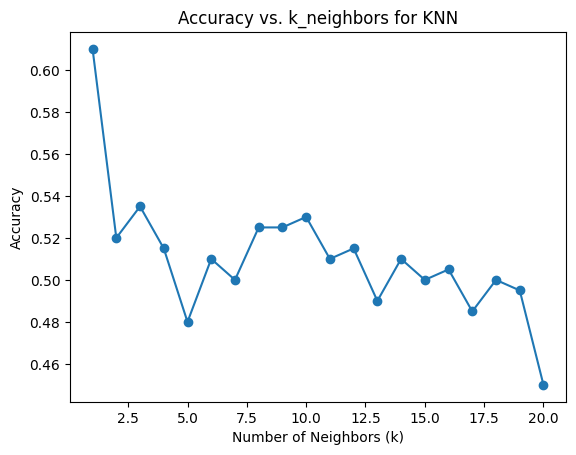

In [31]:
# Separate features (X) and target variable (y)
X = df.drop('TARGET CLASS', axis=1)
y = df['TARGET CLASS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate KNN for different values of k_neighbors
k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the accuracy scores for different k_neighbors
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Accuracy vs. k_neighbors for KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.show()


## More different Method

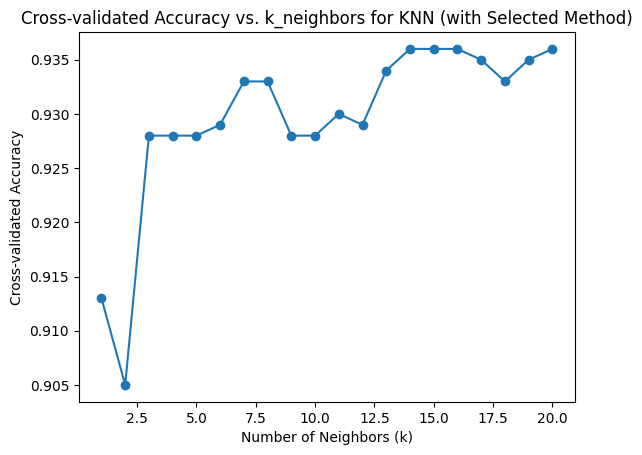

In [32]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score

# Separate features (X) and target variable (y)
X = df.drop('TARGET CLASS', axis=1)
y = df['TARGET CLASS']

# Method 1: Feature Engineering
# Example: Create a new feature representing the total sum of the features
X['Total_Sum'] = X.sum(axis=1)

# Method 2: Dimensionality Reduction using PCA
pca = PCA(n_components=5)  # Choose an appropriate number of components
X_pca = pca.fit_transform(X)

# Method 3: Feature Selection using SelectKBest
selector = SelectKBest(f_classif, k=5)  # Choose an appropriate number of features
X_selected = selector.fit_transform(X, y)

# Method 4: Optimal Hyperparameter Tuning
k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    # Choose the method you want to use (e.g., X, X_pca, X_selected)
    X_method = X_selected  # Change this line accordingly
    
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_classifier, X_method, y, cv=5)
    accuracy_scores.append(scores.mean())

# Plot the accuracy scores for different k_neighbors
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Cross-validated Accuracy vs. k_neighbors for KNN (with Selected Method)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-validated Accuracy')
plt.show()

Method 1: Feature Engineering adds a new feature to your dataset.

Method 2: Dimensionality Reduction using PCA reduces the dimensionality of your dataset.

Method 3: Feature Selection using SelectKBest selects the k best features from your dataset.

Method 4: Optimal Hyperparameter Tuning evaluates the cross-validated accuracy for different values of k_neighbors.

# method 3

## this are Popular method

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, PowerTransformer, QuantileTransformer, Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

def knn_with_all_meathod(scalar_function, n_components=5, k_range=(1, 21)):
    # Load your DataFrame
    # df = ...

    # Separate features (X) and target variable (y)
    X = df.drop('TARGET CLASS', axis=1)
    y = df['TARGET CLASS']

    # Feature Scaling
    scaler = scalar_function()
    X_scaled = scaler.fit_transform(X)

    # Dimensionality Reduction with PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)

    # Optimal Hyperparameter Tuning with Cross-Validation
    best_k_neighbors = None
    best_accuracy = 0
    for k_neighbors in range(*k_range):
        knn_classifier = KNeighborsClassifier(n_neighbors=k_neighbors)
        scores = cross_val_score(knn_classifier, X_pca, y, cv=5)
        mean_accuracy = scores.mean()
        if mean_accuracy > best_accuracy:
            best_accuracy = mean_accuracy
            best_k_neighbors = k_neighbors

    # Instantiate the best KNN classifier
    best_knn_classifier = KNeighborsClassifier(n_neighbors=best_k_neighbors)

    # Evaluate the best KNN classifier
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
    best_knn_classifier.fit(X_train, y_train)
    y_pred = best_knn_classifier.predict(X_test)

    # Display Results
    print(f'Best Number of Neighbors: {best_k_neighbors}')
    print(f'Accuracy on Test Set: {accuracy_score(y_test, y_pred):.2f}\n')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

### StandardScaler

In [34]:
# Example usage with StandardScalerS
knn_with_all_meathod(StandardScaler)

Best Number of Neighbors: 20
Accuracy on Test Set: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        98
           1       0.95      0.95      0.95       102

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



## For all scalar

In [35]:
def find_best_k_and_scalar(df, n_components=5, k_range=(1, 21)):
    # Separate features (X) and target variable (y)
    X = df.drop('TARGET CLASS', axis=1)
    y = df['TARGET CLASS']

    scalar_functions = [
        StandardScaler,
        MinMaxScaler,
        RobustScaler,
        MaxAbsScaler,
        PowerTransformer,
        QuantileTransformer,
        Normalizer
    ]

    best_scalar = None
    best_k_neighbors = None
    best_accuracy = 0

    for scalar_func in scalar_functions:
        print(f'{scalar_func.__name__}:')
        
        # Feature Scaling
        scaler = scalar_func()
        X_scaled = scaler.fit_transform(X)

        # Dimensionality Reduction with PCA
        pca = PCA(n_components=n_components)
        X_pca = pca.fit_transform(X_scaled)

        # Optimal Hyperparameter Tuning with Cross-Validation
        for k_neighbors in range(*k_range):
            knn_classifier = KNeighborsClassifier(n_neighbors=k_neighbors)
            scores = cross_val_score(knn_classifier, X_pca, y, cv=5)
            mean_accuracy = scores.mean()
            if mean_accuracy > best_accuracy or (mean_accuracy == best_accuracy and k_neighbors < best_k_neighbors):
                best_accuracy = mean_accuracy
                best_k_neighbors = k_neighbors
                best_scalar = scalar_func.__name__
        
        print(f'  k_neighbors={best_k_neighbors}, accuracy={best_accuracy:.2f}\n')

    # Print the overall best scalar function and its classification report
    print(f'Best scalar function: {best_scalar}')
    print(f'Best Classification Report for k_neighbors={best_k_neighbors}:\n')

    # Reinitialize the best scaler with the best k_neighbors
    best_scaler_func = next(scalar for scalar in scalar_functions if scalar.__name__ == best_scalar)
    best_scaler = best_scaler_func()
    X_scaled = best_scaler.fit_transform(X)
    
    # Split the scaled data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Initialize the KNN classifier with the best k_neighbors
    best_knn_classifier = KNeighborsClassifier(n_neighbors=best_k_neighbors)
    best_knn_classifier.fit(X_train, y_train)

    # Make predictions on the scaled test data
    y_pred = best_knn_classifier.predict(X_test)

    # Print the classification report
    print(classification_report(y_test, y_pred))

# Call the function
find_best_k_and_scalar(df)


StandardScaler:
  k_neighbors=20, accuracy=0.94

MinMaxScaler:
  k_neighbors=20, accuracy=0.94

RobustScaler:
  k_neighbors=13, accuracy=0.94

MaxAbsScaler:
  k_neighbors=13, accuracy=0.94

PowerTransformer:
  k_neighbors=13, accuracy=0.94

QuantileTransformer:
  k_neighbors=13, accuracy=0.94

Normalizer:
  k_neighbors=13, accuracy=0.94

Best scalar function: RobustScaler
Best Classification Report for k_neighbors=13:

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        98
           1       0.95      0.95      0.95       102

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

